# Clustering Jerárquico - Ejercicios

---

Este cuaderno contiene ejercicios prácticos para consolidar los conceptos del Módulo Clustering Jerárquico.

## Configuración Inicial

Ejecuta esta celda antes de comenzar los ejercicios.

In [135]:
# Bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scipy: clustering jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist, squareform

# Scikit-learn
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Configuración completada.")

Configuración completada.


---

## Ejercicio 1: Comprensión del Algoritmo Aglomerativo

### Contexto

Para comprender el funcionamiento del clustering jerárquico aglomerativo, es fundamental entender cómo se construye la matriz de linkage y cómo interpretar cada fusión.

### Datos

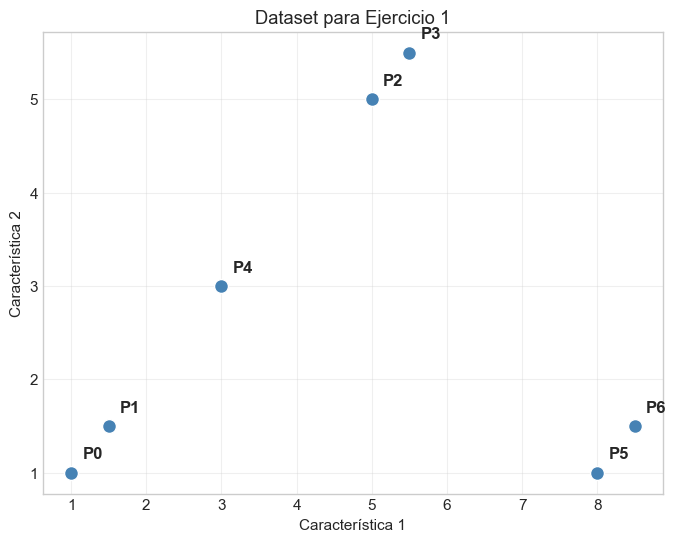

In [136]:
# Dataset pequeño para análisis manual
X_ej1 = np.array([
    [1.0, 1.0],   # Punto 0
    [1.5, 1.5],   # Punto 1
    [5.0, 5.0],   # Punto 2
    [5.5, 5.5],   # Punto 3
    [3.0, 3.0],   # Punto 4
    [8.0, 1.0],   # Punto 5
    [8.5, 1.5]    # Punto 6
])

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_ej1[:, 0], X_ej1[:, 1], c='steelblue', s=100, edgecolors='w')
for i, (x, y) in enumerate(X_ej1):
    plt.annotate(f'P{i}', (x + 0.15, y + 0.15), fontsize=12, fontweight='bold')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 1')
plt.grid(True, alpha=0.3)
plt.show()

### Tarea 1.1: Cálculo de la Matriz de Distancias

Calcule la matriz de distancias euclidianas entre todos los pares de puntos.

In [137]:
distancias_condensadas = pdist(X_ej1, "euclidean")
print(distancias_condensadas)

[0.70710678 5.65685425 6.36396103 2.82842712 7.         7.51664819
 4.94974747 5.65685425 2.12132034 6.51920241 7.         0.70710678
 2.82842712 5.         4.94974747 3.53553391 5.14781507 5.
 5.38516481 5.70087713 0.70710678]


In [138]:
# TODO: Calcular la matriz de distancias
# Use scipy.spatial.distance.pdist y squareform

# Su código aquí
distancias_condensadas = pdist(X_ej1, "euclidean")
matriz_distancias = squareform(distancias_condensadas)

# Mostrar matriz de distancias
if matriz_distancias is not None:
    print("Matriz de distancias:")
    df_dist = pd.DataFrame(
        matriz_distancias,
        index=[f'P{i}' for i in range(len(X_ej1))],
        columns=[f'P{i}' for i in range(len(X_ej1))]
    )
    print(df_dist.round(3))

Matriz de distancias:
       P0     P1     P2     P3     P4     P5     P6
P0  0.000  0.707  5.657  6.364  2.828  7.000  7.517
P1  0.707  0.000  4.950  5.657  2.121  6.519  7.000
P2  5.657  4.950  0.000  0.707  2.828  5.000  4.950
P3  6.364  5.657  0.707  0.000  3.536  5.148  5.000
P4  2.828  2.121  2.828  3.536  0.000  5.385  5.701
P5  7.000  6.519  5.000  5.148  5.385  0.000  0.707
P6  7.517  7.000  4.950  5.000  5.701  0.707  0.000


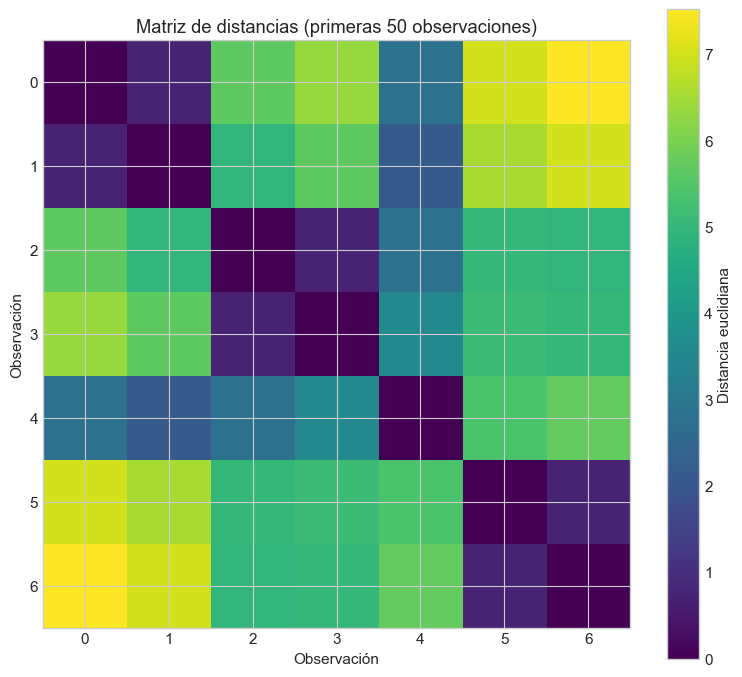

In [139]:
# Visualización de la matriz de distancias (subconjunto)
fig, ax = plt.subplots(figsize=(8, 7))
im = ax.imshow(matriz_distancias[:7, :7], cmap='viridis')
ax.set_xlabel('Observación')
ax.set_ylabel('Observación')
ax.set_title('Matriz de distancias (primeras 50 observaciones)')
plt.colorbar(im, ax=ax, label='Distancia euclidiana')
plt.tight_layout()
plt.show()

### Tarea 1.2: Identificación de la Primera Fusión

Identifique manualmente qué par de puntos tiene la menor distancia y por tanto se fusionará primero.

In [140]:
# TODO: Encontrar el par de puntos con menor distancia
# Sugerencia: Use np.unravel_index y np.argmin sobre la matriz
# Recuerde que la diagonal es 0, debe ignorarla

# Su código aquí
mask=matriz_distancias.copy()
mask[mask==0]=np.inf
idx_flat=np.argmin(mask)

i,j=np.unravel_index(idx_flat, mask.shape)

# Verificar con la función linkage
Z=linkage(X_ej1, method="single")
print(Z)

[[ 0.          1.          0.70710678  2.        ]
 [ 2.          3.          0.70710678  2.        ]
 [ 5.          6.          0.70710678  2.        ]
 [ 4.          7.          2.12132034  3.        ]
 [ 8.         10.          2.82842712  5.        ]
 [ 9.         11.          4.94974747  7.        ]]


### Tarea 1.3: Interpretación de la Matriz de Linkage

Analice la matriz de linkage completa y describa cada fusión.

In [141]:
# TODO: Mostrar e interpretar la matriz de linkage completa
# Para cada fila, identificar qué clusters se fusionan
# Recuerde: índices >= n representan clusters formados previamente

print("Matriz de linkage (Single Linkage):")
print("Primeras 5 fusiones (single):")
print(f"{'Fusión':<8} {'Cluster A':<12} {'Cluster B':<12} {'Distancia':<12} {'Tamaño':<12}")
print("-" * 54)

n = len(X_ej1)
for i, fila in enumerate(Z):
    # TODO: Interpretar cada fusión
    print(f"{i+1:<8} {int(Z[i,0]):<12} {int(Z[i,1]):<15} {Z[i,2]:<12.4f} {int(Z[i,3]):<10}")

    # Si el índice >= n, es un cluster formado en la fusión (índice - n)

    # Su código aquí para imprimir la interpretación
    pass

Matriz de linkage (Single Linkage):
Primeras 5 fusiones (single):
Fusión   Cluster A    Cluster B    Distancia    Tamaño      
------------------------------------------------------
1        0            1               0.7071       2         
2        2            3               0.7071       2         
3        5            6               0.7071       2         
4        4            7               2.1213       3         
5        8            10              2.8284       5         
6        9            11              4.9497       7         


In [142]:
z_complete=linkage(X_ej1, method="complete")
print(f"{'Fusión':<8} {'Cluster A':<12} {'Cluster B':<12} {'Distancia':<12} {'Tamaño':<12}")
for i, fila in enumerate(Z):
    # TODO: Interpretar cada fusión
    print(f"{i+1:<8} {int(z_complete[i,0]):<12} {int(z_complete[i,1]):<15} {z_complete[i,2]:<12.4f} {int(z_complete[i,3]):<10}")


Fusión   Cluster A    Cluster B    Distancia    Tamaño      
1        0            1               0.7071       2         
2        2            3               0.7071       2         
3        5            6               0.7071       2         
4        4            7               2.8284       3         
5        8            9               5.1478       4         
6        10           11              7.5166       7         


### Pregunta de Reflexión 1

Observe la secuencia de fusiones:

1. ¿Qué grupos naturales se forman primero?
2. ¿Cuándo se fusiona el punto P4 (el punto central)?
3. ¿Cómo cambiaría la secuencia si usáramos complete linkage en lugar de single linkage?

*Escriba su respuesta aquí:*

1.primero se fusiona el Punto P0 con el punto P1 luego el P2 con el P3 
2.El punto P4 se fusiona en cuarto lugar y se fusiona con un cluster de dos pntos



---

## Ejercicio 2: Comparación de Criterios de Enlace

### Contexto

El criterio de enlace tiene un impacto significativo en la estructura jerárquica resultante. En este ejercicio, comparará los cuatro criterios principales.

### Datos

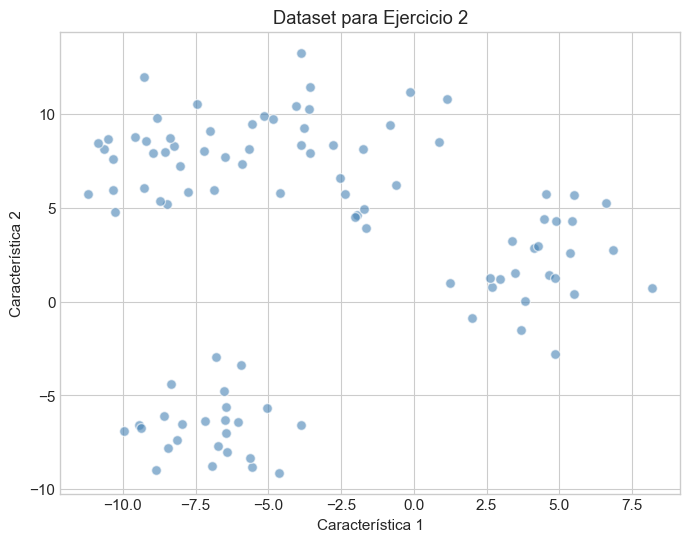

In [143]:
# Dataset para comparación de criterios
X_ej2, y_ej2 = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=[2.3, 2.4, 1.6, 1.7],
    random_state=RANDOM_STATE
)

plt.figure(figsize=(8, 6))
plt.scatter(X_ej2[:, 0], X_ej2[:, 1], c='steelblue', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 2')
plt.show()

### Tarea 2.1: Calcular Linkage con Cada Criterio

Calcule la matriz de linkage para single, complete, average y ward.

In [144]:
# TODO: Calcular linkage con cada criterio
metodos = ['single', 'complete', 'average', 'ward']
resultados_linkage = {}

for metodo in metodos:
    resultados_linkage[metodo]=linkage(X_ej2, method=metodo)
    pass

# Verificar
for metodo, Z in resultados_linkage.items():
    print(f"{metodo}: matriz de forma {Z.shape}")

single: matriz de forma (99, 4)
complete: matriz de forma (99, 4)
average: matriz de forma (99, 4)
ward: matriz de forma (99, 4)


### Tarea 2.2: Visualizar Dendrogramas

Genere los dendrogramas para cada criterio de enlace en una figura con 4 subplots.

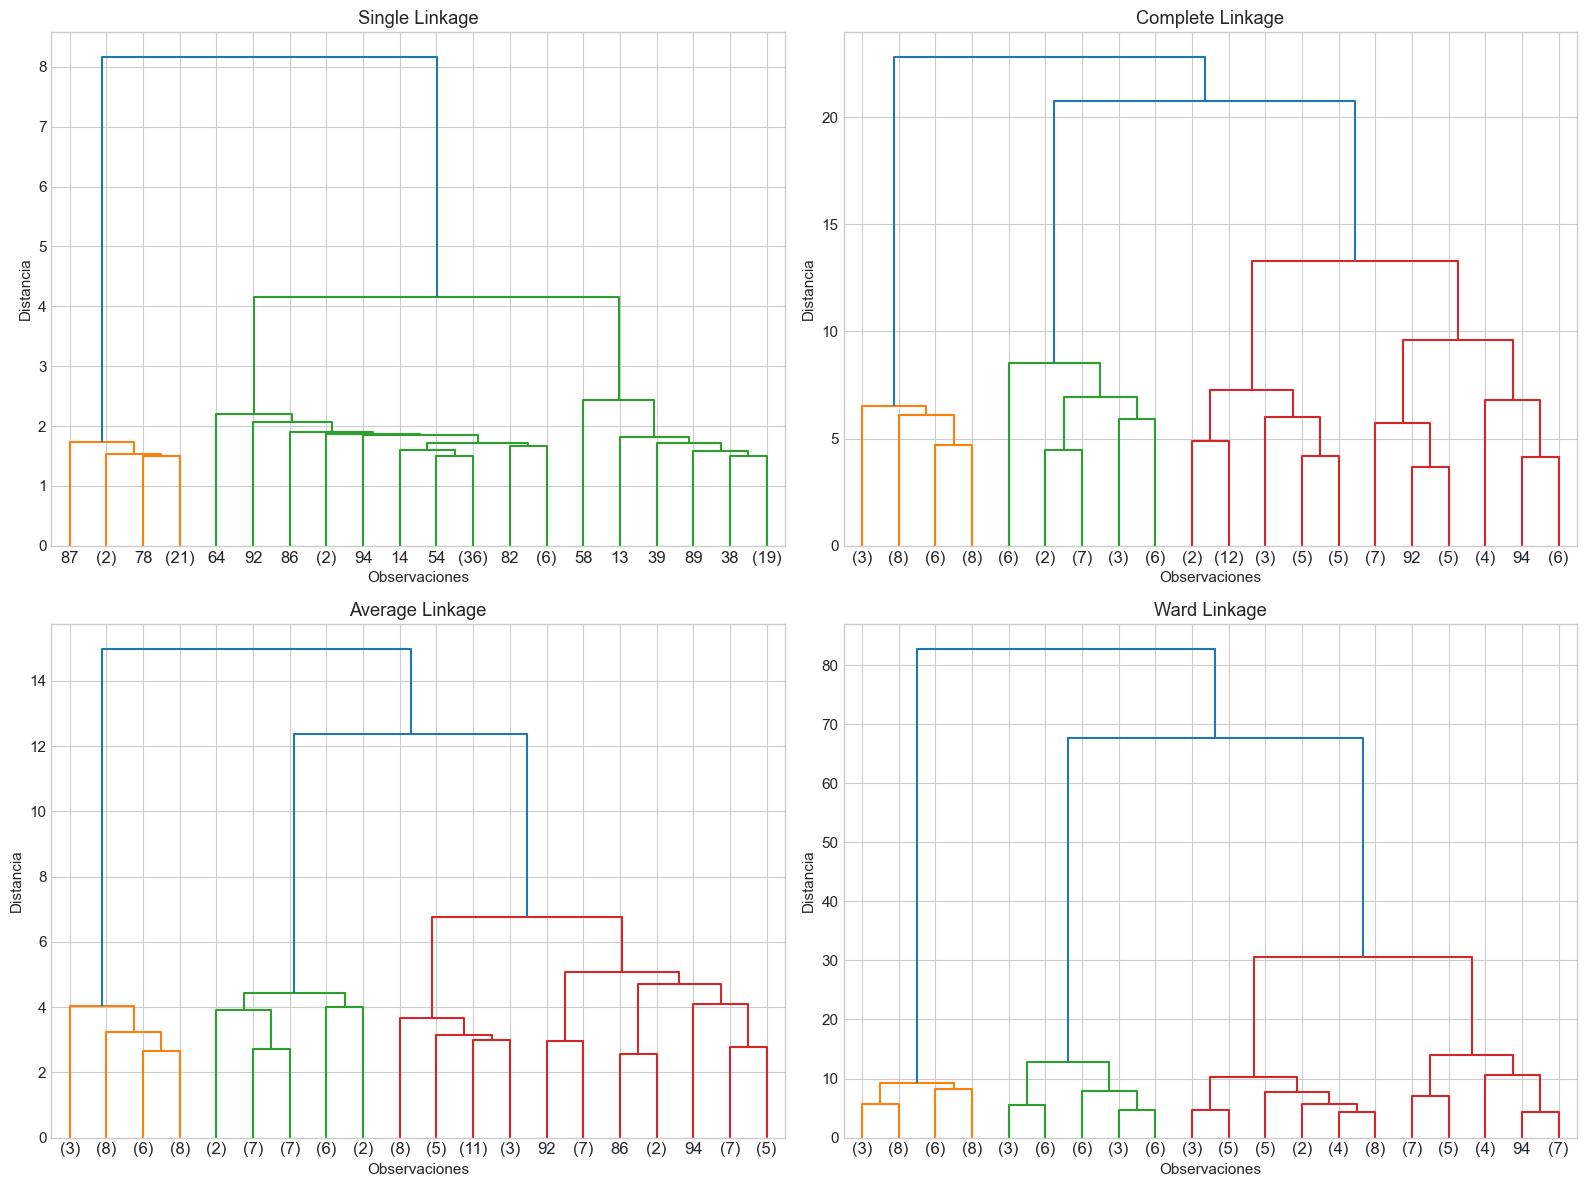

In [145]:
# TODO: Crear figura con 4 dendrogramas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, metodo in enumerate(metodos):
    ax = axes[idx]

    # TODO: Generar dendrograma para cada método
    # Use truncate_mode='lastp', p=20 para visualización más clara

    # Su código aquí
    dendrogram(resultados_linkage[metodo],
                 ax=ax,
                 truncate_mode='lastp',
                 p=20)
    ax.set_title(f'{metodo.capitalize()} Linkage')
    ax.set_xlabel('Observaciones')
    ax.set_ylabel('Distancia')

plt.tight_layout()
plt.show()

### Tarea 2.3: Comparar Particiones con k=4

Corte cada dendrograma para obtener 4 clusters y compare las particiones resultantes.

In [146]:
# TODO: Obtener particiones y calcular métricas
k = 4

print(f"Comparación de criterios de enlace (k={k}):")
print("=" * 60)
print(f"{'Criterio':<15} {'Silueta':<12} {'ARI':<12} {'NMI':<12}")
print("-" * 60)

for metodo in metodos:
    # TODO: Obtener labels con fcluster
    # TODO: Calcular silhouette_score, adjusted_rand_score, normalized_mutual_info_score
    labels=fcluster(resultados_linkage[metodo], t=k, criterion="maxclust",)
    # Su código aquí
    silueta=silhouette_score(X_ej2, labels)
    Ari=adjusted_rand_score(y_ej2, labels)
    nmi = normalized_mutual_info_score(y_ej2, labels)
    print(f"{metodo:<15} {silueta:<12.2f} { Ari:<12.2f} {nmi:<12.2f}")

    pass

Comparación de criterios de enlace (k=4):
Criterio        Silueta      ARI          NMI         
------------------------------------------------------------
single          0.53         0.66         0.81        
complete        0.59         0.92         0.92        
average         0.59         0.92         0.92        
ward            0.59         0.92         0.92        


### Pregunta de Reflexión 2

Analice los resultados de la comparación:

1. ¿Qué criterio de enlace produce la mejor silueta? ¿Y el mejor ARI?
2. Observe las diferencias visuales entre los dendrogramas. ¿Cuál parece tener clusters más balanceados?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 3: Selección del Número de Clusters

### Contexto

Una ventaja del clustering jerárquico es que permite explorar diferentes niveles de granularidad sin re-ejecutar el algoritmo. En este ejercicio, aplicará diferentes métodos para determinar el número óptimo de clusters.

### Datos

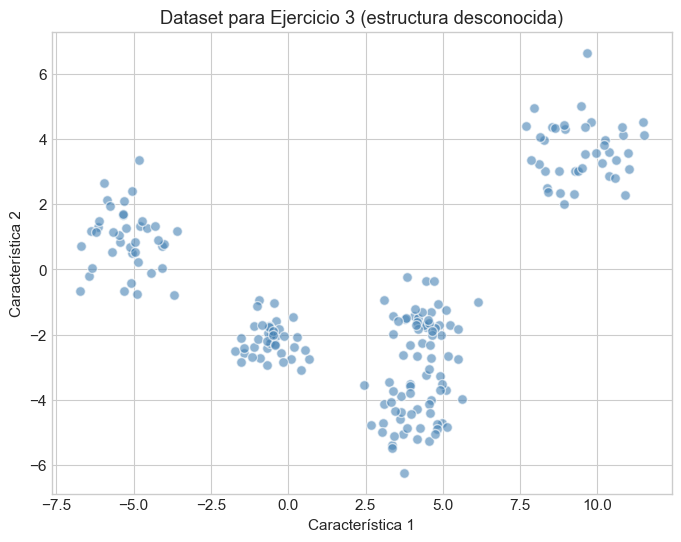

In [147]:
# Dataset con estructura desconocida
np.random.seed(123)
X_ej3, y_ej3_oculto = make_blobs(
    n_samples=200,
    n_features=2,
    centers=5,
    cluster_std=[0.7, 0.9, 0.8, 1.0, 0.6],
    random_state=123
)

# Calcular linkage (Ward)
Z_ej3 = linkage(X_ej3, method='ward')

plt.figure(figsize=(8, 6))
plt.scatter(X_ej3[:, 0], X_ej3[:, 1], c='steelblue', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 3 (estructura desconocida)')
plt.show()

### Tarea 3.1: Análisis de Distancias de Fusión

Extraiga las distancias de fusión y calcule las diferencias entre fusiones consecutivas para identificar saltos.

array([ 2.11335823,  9.11730077, 18.11630383, 24.82462206, 26.94389474])

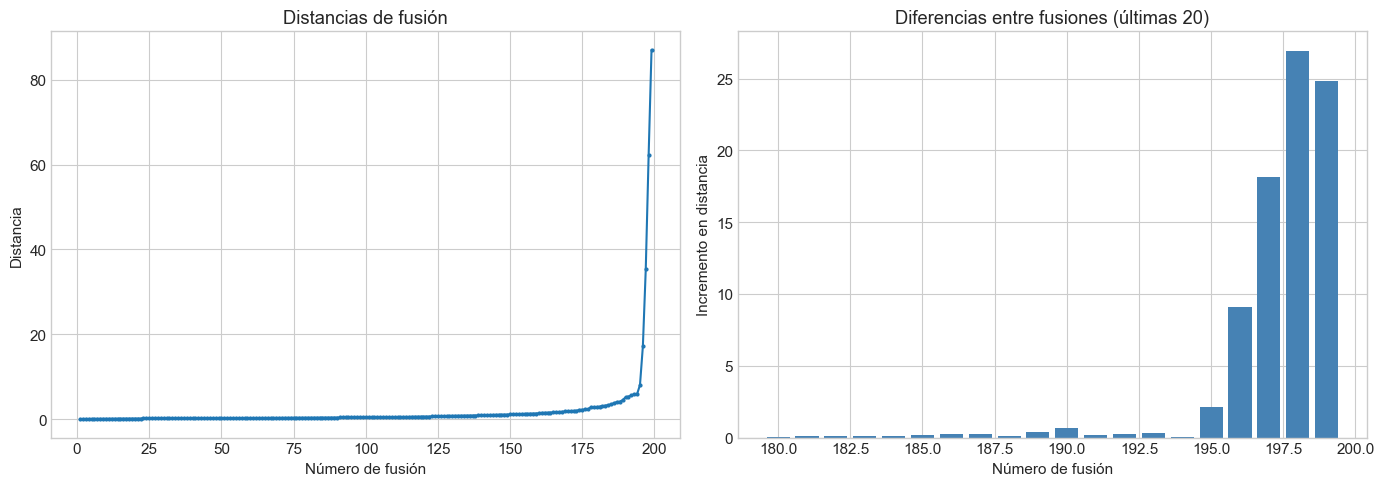

In [161]:
# TODO: Extraer distancias de fusión y calcular diferencias
# Las distancias están en la tercera columna de Z (índice 2)

distancias_fusion = Z_ej3[:,2]
diferencias = np.diff(distancias_fusion)  # Reemplazar (use np.diff)

# TODO: Identificar los 5 mayores saltos y sus k correspondientes
# Su código aquí
# argsort devuelve los índices ordenados de menor → mayor
idx_ordenados=np.argsort(diferencias)
top_5_idx=idx_ordenados[-5:]
top5_idx_ordenados = top_5_idx[np.argsort(diferencias[top_5_idx])[::-1]]  ## ordenados de mayor a menor



# Visualización
if diferencias is not None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de distancias
    axes[0].plot(range(1, len(distancias_fusion)+1), distancias_fusion, 'o-', markersize=2)
    axes[0].set_xlabel('Número de fusión')
    axes[0].set_ylabel('Distancia')
    axes[0].set_title('Distancias de fusión')

    # Gráfico de diferencias (últimas 20)
    ultimas = 20
    axes[1].bar(range(len(X_ej3)-ultimas, len(X_ej3)), diferencias[-ultimas:], color='steelblue')
    axes[1].set_xlabel('Número de fusión')
    axes[1].set_ylabel('Incremento en distancia')
    axes[1].set_title(f'Diferencias entre fusiones (últimas {ultimas})')

    plt.tight_layout()
    plt.show()

In [164]:
### Indices con mayor salto
print(top5_idx_ordenados)
## Salto realizados
diferencias[top5_idx_ordenados]

[196 197 195 194 193]


array([26.94389474, 24.82462206, 18.11630383,  9.11730077,  2.11335823])

In [165]:
for i in top5_idx_ordenados:
    print(
        f"Salto = {diferencias[i]:.3f} "
        f"entre {distancias_fusion[i]:.3f} → {distancias_fusion[i+1]:.3f}"
    )

Salto = 26.944 entre 35.283 → 62.227
Salto = 24.825 entre 62.227 → 87.052
Salto = 18.116 entre 17.167 → 35.283
Salto = 9.117 entre 8.049 → 17.167
Salto = 2.113 entre 5.936 → 8.049


In [177]:
n = X_ej3.shape[0]

k_sugeridos ={} 
for i in top5_idx_ordenados:
    k_sugeridos[i] =n - i -1
print(k_sugeridos)

{np.int64(196): np.int64(3), np.int64(197): np.int64(2), np.int64(195): np.int64(4), np.int64(194): np.int64(5), np.int64(193): np.int64(6)}


### Tarea 3.2: Método de la Silueta

Calcule el coeficiente de silueta para diferentes valores de k.

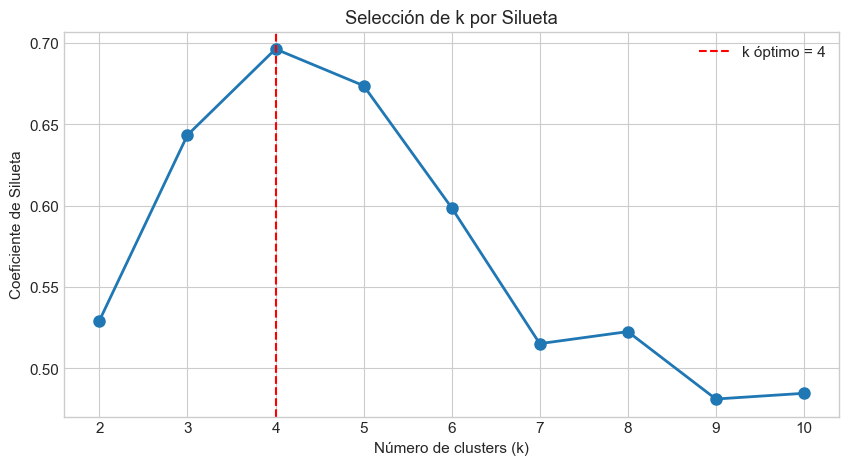

In [183]:
# TODO: Calcular silueta para k = 2 a 10
k_range = range(2, 11)
siluetas= []

for k in k_range:
    labels=fcluster(Z_ej3, t=k, criterion="maxclust")
    # TODO: Obtener labels con fcluster y calcular silueta
    # Su código aquí
    siluetas.append(silhouette_score(X_ej3, labels))
    pass

# Visualización
if len(siluetas) > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(k_range, siluetas, 'o-', linewidth=2, markersize=8)
    plt.axvline(x=k_range[np.argmax(siluetas)], color='red', linestyle='--',
                label=f'k óptimo = {k_range[np.argmax(siluetas)]}')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Selección de k por Silueta')
    plt.legend()
    plt.xticks(k_range)
    plt.show()

### Tarea 3.3: Visualización del Dendrograma con Corte

Genere el dendrograma y marque el corte óptimo.

In [ ]:
# TODO: Generar dendrograma con línea de corte
fig, ax = plt.subplots(figsize=(14, 7))

# TODO: Crear dendrograma con dendrogram()
# TODO: Añadir línea horizontal en la altura de corte apropiada

# Su código aquí

ax.set_xlabel('Observaciones')
ax.set_ylabel('Distancia')
ax.set_title('Dendrograma con línea de corte')

plt.tight_layout()
plt.show()

### Pregunta de Reflexión 3

Basándose en los análisis realizados:

1. ¿Qué valor de k sugieren las diferencias en distancias de fusión?
2. ¿Qué valor de k maximiza el coeficiente de silueta?
3. ¿Los dos métodos coinciden? Si no, ¿cuál consideraría más confiable y por qué?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 4: Efecto Cadena y Formas No Convexas

### Contexto

Single linkage puede detectar clusters de forma arbitraria, pero es susceptible al efecto cadena. En este ejercicio, explorará ambos comportamientos.

### Datos

In [ ]:
# Dataset 1: Lunas (formas no convexas)
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=RANDOM_STATE)

# Dataset 2: Clusters con puente (propenso a efecto cadena)
np.random.seed(RANDOM_STATE)
cluster_a = np.random.randn(60, 2) * 0.4 + np.array([-2, 0])
cluster_b = np.random.randn(60, 2) * 0.4 + np.array([2, 0])
puente = np.column_stack([np.linspace(-1.5, 1.5, 8), np.random.randn(8) * 0.05])
X_puente = np.vstack([cluster_a, cluster_b, puente])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', edgecolors='w', s=50)
axes[0].set_title('Dataset 1: Lunas')
axes[0].set_xlabel('Característica 1')
axes[0].set_ylabel('Característica 2')

axes[1].scatter(cluster_a[:, 0], cluster_a[:, 1], c='#3498db', edgecolors='w', s=50, label='Cluster A')
axes[1].scatter(cluster_b[:, 0], cluster_b[:, 1], c='#e74c3c', edgecolors='w', s=50, label='Cluster B')
axes[1].scatter(puente[:, 0], puente[:, 1], c='#2ecc71', edgecolors='w', s=80, marker='s', label='Puente')
axes[1].set_title('Dataset 2: Clusters con puente')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')
axes[1].legend()

plt.tight_layout()
plt.show()

### Tarea 4.1: Clustering de Lunas con Diferentes Criterios

Aplique single, complete y ward linkage al dataset de lunas y compare los resultados.

In [ ]:
# TODO: Aplicar cada criterio y visualizar resultados
criterios = ['single', 'complete', 'ward']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, criterio in enumerate(criterios):
    ax = axes[idx]

    # TODO: Aplicar AgglomerativeClustering con n_clusters=2
    # TODO: Calcular ARI comparando con y_moons
    # TODO: Visualizar el resultado

    # Su código aquí

    ax.set_title(f'{criterio.capitalize()}')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.suptitle('Clustering de Lunas por Criterio de Enlace', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Tarea 4.2: Demostración del Efecto Cadena

Aplique single y ward linkage al dataset con puente y observe el efecto cadena.

In [ ]:
# TODO: Comparar single vs ward en el dataset con puente
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, criterio in enumerate(['single', 'ward']):
    ax = axes[idx]

    # TODO: Aplicar AgglomerativeClustering con n_clusters=2
    # TODO: Visualizar resultado
    # TODO: Contar cuántos puntos hay en cada cluster

    # Su código aquí

    ax.set_title(f'{criterio.capitalize()} Linkage')
    ax.set_xlabel('Característica 1')
    ax.set_ylabel('Característica 2')

plt.suptitle('Efecto Cadena: Single vs Ward', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Pregunta de Reflexión 4

Analice los resultados:

1. ¿Por qué single linkage funciona bien con las lunas pero falla con el puente?
2. ¿Cómo se podría mitigar el efecto cadena en single linkage?
3. ¿En qué situaciones reales podría ocurrir un "puente" de puntos entre clusters?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 5: Caso Práctico - Segmentación de Especies

### Contexto

El dataset Iris es un clásico en machine learning. Aplicará clustering jerárquico para descubrir agrupaciones naturales de especies de flores.

### Datos

In [ ]:
# Cargar dataset Iris
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target
nombres_features = iris.feature_names
nombres_especies = iris.target_names

print(f"Dimensiones: {X_iris.shape}")
print(f"Características: {nombres_features}")
print(f"Especies: {nombres_especies}")
print(f"\nDistribución de especies: {np.bincount(y_iris)}")

### Tarea 5.1: Preprocesamiento y Análisis Exploratorio

In [ ]:
# TODO: Estandarizar los datos
scaler = StandardScaler()
X_iris_scaled = None  # Reemplazar

# TODO: Visualizar pares de características coloreadas por especie real
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Su código aquí para crear scatter plots de:
# - sepal length vs sepal width
# - petal length vs petal width
# - sepal length vs petal length

plt.tight_layout()
plt.show()

### Tarea 5.2: Dendrograma y Selección de Clusters

In [ ]:
# TODO: Calcular linkage (Ward) y generar dendrograma
# TODO: Analizar la estructura del dendrograma

fig, ax = plt.subplots(figsize=(14, 7))

# Su código aquí

ax.set_xlabel('Muestras')
ax.set_ylabel('Distancia')
ax.set_title('Dendrograma del Dataset Iris (Ward)')

plt.tight_layout()
plt.show()

### Tarea 5.3: Evaluación de la Partición

In [ ]:
# TODO: Evaluar particiones con k=2, 3 y 4
# TODO: Calcular silueta y ARI para cada k
# TODO: Determinar cuál k es más apropiado

print("Evaluación de diferentes valores de k:")
print("=" * 50)
print(f"{'k':<5} {'Silueta':<12} {'ARI':<12} {'NMI':<12}")
print("-" * 50)

for k in [2, 3, 4]:
    # Su código aquí
    pass

### Tarea 5.4: Análisis de Errores de Clasificación

In [ ]:
# TODO: Con k=3, analizar la matriz de confusión entre clusters y especies
# TODO: Identificar qué especies se confunden más

# Su código aquí

# Sugerencia: Use pd.crosstab para crear matriz de contingencia

### Pregunta de Reflexión 5

Analice los resultados del clustering sobre Iris:

1. ¿Cuántos clusters naturales sugiere el dendrograma?
2. Con k=3, ¿qué especie es más fácil de separar? ¿Cuáles se confunden?
3. ¿Por qué la silueta para k=2 es mayor que para k=3, a pesar de que hay 3 especies?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 6: Análisis de Escalabilidad

### Contexto

El clustering jerárquico tiene limitaciones de escalabilidad debido a su complejidad O(n² log n) temporal y O(n²) espacial. En este ejercicio, medirá empíricamente estos límites.

### Datos

In [ ]:
import time

# Tamaños de dataset a evaluar
tamanos = [100, 250, 500, 1000, 2000, 3000]

### Tarea 6.1: Medir Tiempos de Ejecución

In [ ]:
# TODO: Medir tiempo de ejecución para cada tamaño
tiempos = []

print(f"{'n':<10} {'Tiempo (s)':<15}")
print("-" * 25)

for n in tamanos:
    # TODO: Generar datos con make_blobs
    # TODO: Medir tiempo de linkage (Ward)

    # Su código aquí
    pass

# TODO: Visualizar la relación entre n y tiempo
if len(tiempos) > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(tamanos, tiempos, 'o-', linewidth=2, markersize=8)
    plt.xlabel('Número de observaciones (n)')
    plt.ylabel('Tiempo (segundos)')
    plt.title('Escalabilidad del Clustering Jerárquico')
    plt.show()

### Tarea 6.2: Estimar Complejidad Empírica

In [ ]:
# TODO: Ajustar un modelo para estimar la complejidad
# La complejidad teórica es O(n² log n)
# Verificar si los tiempos medidos siguen esta tendencia

# Sugerencia: Calcular t / (n² * log(n)) para cada n
# Si la complejidad es correcta, este ratio debería ser aproximadamente constante

if len(tiempos) > 0:
    print("Verificación de complejidad O(n² log n):")
    print(f"{'n':<10} {'t (s)':<12} {'t / (n² log n)':<20}")
    print("-" * 42)

    for n, t in zip(tamanos, tiempos):
        # Su código aquí
        pass

### Pregunta de Reflexión 6

Basándose en sus mediciones:

1. ¿Aproximadamente cuánto tiempo tomaría procesar un dataset de 50,000 observaciones?
2. ¿Cuál sería el límite práctico de n en un entorno con restricciones de tiempo (ej. < 1 minuto)?
3. ¿Qué alternativas existen para aplicar clustering jerárquico a datasets grandes?

*Escriba su respuesta aquí:*

...

# EOF (End Of File)